# **EDA inicial del database `business`**

Se cargan las librerías que se van utilizar y la base **`business_yelp`**

In [2]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt  # type: ignore
import numpy as np  # type: ignore
import seaborn as sns  # type: ignore
import ast # type: ignore

In [2]:
business_yelp = pd.read_pickle(r'Yelp\business.pkl')

In [3]:
business_yelp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150346 entries, 0 to 150345
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
 14  business_id   5 non-null       object
 15  name          5 non-null       object
 16  address       5 non-null       object
 17  city          5 non-null       object
 18  state         5 non-null     

> *Puede observarse que la base tiene columnas duplicadas que se eliminan para comenzar los análisis*

In [4]:
# Eliminar las columnas duplicadas asegurando que solo se quedan las primeras apariciones
business_yelp = business_yelp.loc[:, ~business_yelp.columns.duplicated()]

# Verificar las columnas después del cambio
business_yelp.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


> Son solo tres los nulos en la columna `state`, que es la característica principal en la que se basarán los análisis posteriores, por lo tanto las completamos.

In [5]:
# Diccionario con las ciudades y sus respectivos estados
ciudades_a_estados = {
    "Santa Barbara": "CA",  # California
    "Affton": "MO",         # Missouri
    "Tucson": "AZ"          # Arizona
}

# Solo actualizar los valores nulos en 'state'
business_yelp.loc[business_yelp['state'].isnull(), 'state'] = business_yelp.loc[
    business_yelp['state'].isnull(), 'city'
].map(ciudades_a_estados)

In [6]:
business_yelp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150346 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
dtypes: object(14)
memory usage: 17.2+ MB


Chequeo de existencia de duplicados en los registros por `business_id`

In [7]:
# Contar valores duplicados en 'business_id'
duplicados_business = business_yelp[business_yelp.duplicated(subset='business_id', keep=False)]

# Mostrar la cantidad de duplicados
duplicados_business

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours


> No existen duplicados en el dataframe

## Evaluación de la cantidad de negocios por estado

In [8]:
# Contar la cantidad de negocios únicos por estado y ordenarlos de mayor a menor
negocios_por_estado = business_yelp.groupby('state')['business_id'].nunique().reset_index()
negocios_por_estado.columns = ['state', 'cantidad_negocios']
negocios_por_estado = negocios_por_estado.sort_values(by='cantidad_negocios', ascending=False)

# Asegurar que la columna 'stars' sea numérica
business_yelp['stars'] = pd.to_numeric(business_yelp['stars'], errors='coerce')

# Calcular el promedio de estrellas por estado
promedio_stars = business_yelp.groupby('state')['stars'].mean().reset_index()
promedio_stars.columns = ['state', 'promedio_stars']

# Unir los datos con el DataFrame de negocios por estado
negocios_por_estado = negocios_por_estado.merge(promedio_stars, on='state', how='left')

# Mostrar los resultados ordenados
print(negocios_por_estado.head())



  state  cantidad_negocios  promedio_stars
0    PA              34039        3.595875
1    FL              26329        3.599605
2    TN              12056        3.582117
3    IN              11246        3.598702
4    MO              10914        3.618059


In [9]:
# Asegurar que 'is_open' sea numérica
business_yelp['is_open'] = pd.to_numeric(business_yelp['is_open'], errors='coerce')

# Contar negocios abiertos y cerrados por estado
abiertos_cerrados = business_yelp.groupby('state')['is_open'].agg([
    ('abierto', lambda x: (x == 1).sum()),
    ('cerrado', lambda x: (x == 0).sum())
]).reset_index()

# Unir los datos con el DataFrame de negocios por estado
negocios_por_estado = negocios_por_estado.merge(abiertos_cerrados, on='state', how='left')

# Mostrar el resultado final
print(negocios_por_estado.head())


  state  cantidad_negocios  promedio_stars  abierto  cerrado
0    PA              34039        3.595875    27039     7000
1    FL              26329        3.599605    20876     5453
2    TN              12056        3.582117     9617     2439
3    IN              11246        3.598702     8983     2263
4    MO              10914        3.618059     8728     2186


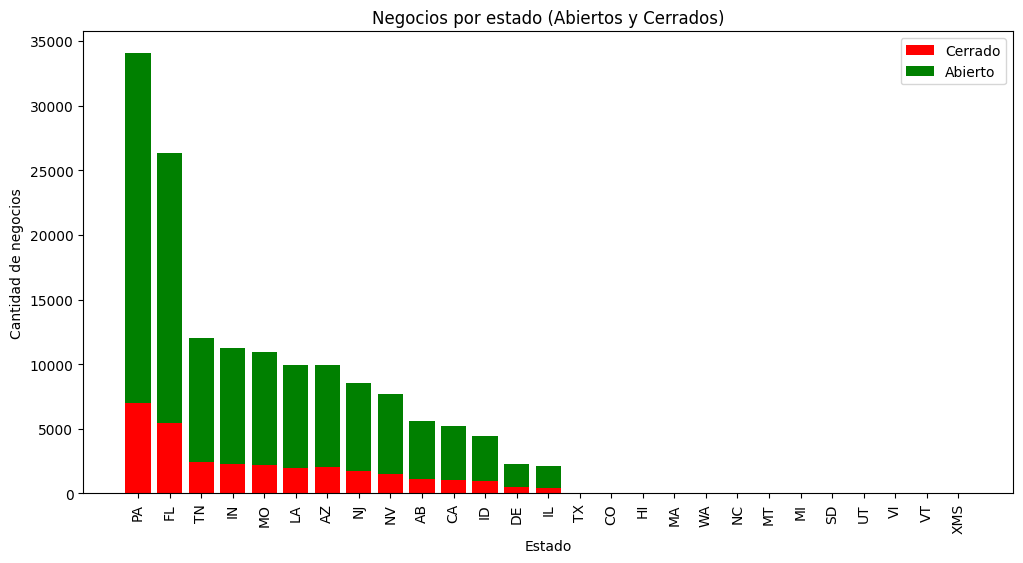

In [10]:
# Asegurar que la columna 'is_open' sea numérica
business_yelp['is_open'] = pd.to_numeric(business_yelp['is_open'], errors='coerce')

# Contar negocios abiertos y cerrados por estado
abiertos_cerrados = business_yelp.groupby('state')['is_open'].agg([
    ('abierto', lambda x: (x == 1).sum()),
    ('cerrado', lambda x: (x == 0).sum())
]).reset_index()

# Ordenar por cantidad total de negocios (abiertos + cerrados) de mayor a menor
abiertos_cerrados['total'] = abiertos_cerrados['abierto'] + abiertos_cerrados['cerrado']
abiertos_cerrados = abiertos_cerrados.sort_values(by='total', ascending=False)

# Definir los datos para el gráfico
estados = abiertos_cerrados['state']
abiertos = abiertos_cerrados['abierto']
cerrados = abiertos_cerrados['cerrado']

# Configurar el gráfico de barras apiladas
plt.figure(figsize=(12, 6))
plt.bar(estados, cerrados, label='Cerrado', color='red')
plt.bar(estados, abiertos, bottom=cerrados, label='Abierto', color='green')

# Personalizar el gráfico
plt.xlabel("Estado")
plt.ylabel("Cantidad de negocios")
plt.title("Negocios por estado (Abiertos y Cerrados)")
plt.legend()
plt.xticks(rotation=90)  # Rotar etiquetas para mejor visualización

# Mostrar el gráfico
plt.show()


### **Conclusiones del Gráfico: Negocios por Estado (Abiertos y Cerrados)**

1. **Distribución desigual de negocios por estado**  
   - Algunos estados tienen una concentración significativamente mayor de negocios en comparación con otros.  
   - Pennsylvania (PA) y Florida (FL) lideran en cantidad de negocios registrados.

2. **Proporción de negocios abiertos y cerrados**  
   - En la mayoría de los estados, la cantidad de negocios abiertos (verde) es mayor que la de negocios cerrados (rojo).  
   - Sin embargo, existe una fracción considerable de negocios cerrados en los estados con mayor cantidad total de registros.

3. **Estados con mayor y menor actividad comercial**  
   - Estados como PA, FL, TN e IN tienen una alta cantidad de negocios, lo que indica que son centros comerciales clave dentro del dataset.  
   - Algunos estados (en el extremo derecho del gráfico) tienen muy pocos negocios, lo que podría deberse a menor actividad económica o falta de datos.

4. **Tendencia general**  
   - A pesar de los cierres, la mayoría de los estados muestran una mayor cantidad de negocios abiertos, lo que sugiere que el ecosistema comercial sigue siendo dinámico y en crecimiento.

## Análisis de `stars` en los estados con mayor cantidad de negocios 

In [11]:
# Asegurar que 'stars' sea numérico
business_yelp['stars'] = pd.to_numeric(business_yelp['stars'], errors='coerce')

# Filtrar solo los estados PA y FL
estados_filtrados = business_yelp[business_yelp['state'].isin(["PA", "FL"])]

# Contar la cantidad de negocios por cada valor de 'stars' en PA y FL
conteo_stars = estados_filtrados.groupby(['state', 'stars'])['business_id'].count().reset_index()

# Renombrar columnas para mayor claridad
conteo_stars.columns = ['state', 'stars', 'cantidad']

# Mostrar el resultado
print(conteo_stars)


   state  stars  cantidad
0     FL    1.0       332
1     FL    1.5       912
2     FL    2.0      1689
3     FL    2.5      2401
4     FL    3.0      3289
5     FL    3.5      4600
6     FL    4.0      5402
7     FL    4.5      4803
8     FL    5.0      2901
9     PA    1.0       459
10    PA    1.5      1140
11    PA    2.0      2134
12    PA    2.5      3212
13    PA    3.0      4189
14    PA    3.5      5996
15    PA    4.0      7093
16    PA    4.5      6144
17    PA    5.0      3672


### **Conclusiones sobre la Distribución de Estrellas por Estado**

- **Tendencia general**: La mayoría de los negocios en FL y PA tienen calificaciones entre 3.5 y 4.5 estrellas, lo que indica una prevalencia de buenas reseñas.  
- **Distribución de bajas calificaciones**: La cantidad de negocios con 1.0 a 2.5 estrellas es significativamente menor en comparación con los de 3.0 o más, lo que sugiere que los negocios mal calificados son una minoría.  
- **Estados similares**: Tanto en FL como en PA, la distribución sigue un patrón ascendente hasta 4.0 estrellas y luego disminuye levemente en 4.5 y 5.0 estrellas.  

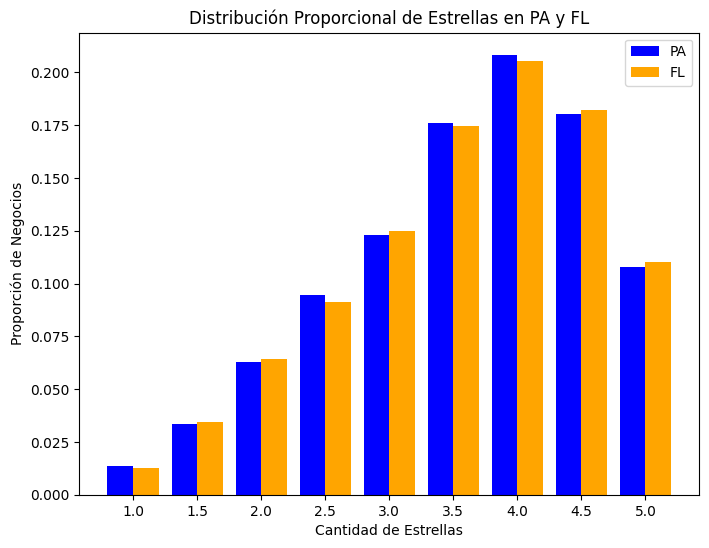

In [12]:
# Calcular el total de negocios por estado
total_negocios_por_estado = conteo_stars.groupby('state')['cantidad'].sum()

# Agregar la columna de proporción
conteo_stars['proporcion'] = conteo_stars.apply(
    lambda row: row['cantidad'] / total_negocios_por_estado[row['state']], axis=1
)

# Pivotar para el gráfico
conteo_pivot = conteo_stars.pivot(index='stars', columns='state', values='proporcion').fillna(0)

# Crear el gráfico de barras agrupadas con proporciones
fig, ax = plt.subplots(figsize=(8, 6))
width = 0.4  # Ancho de las barras
x = np.arange(len(conteo_pivot.index))  # Posiciones en X

# Graficar barras para PA y FL (proporción en lugar de cantidad absoluta)
ax.bar(x - width/2, conteo_pivot['PA'], width, label='PA', color='blue')
ax.bar(x + width/2, conteo_pivot['FL'], width, label='FL', color='orange')

# Configuración del gráfico
ax.set_xlabel("Cantidad de Estrellas")
ax.set_ylabel("Proporción de Negocios")
ax.set_title("Distribución Proporcional de Estrellas en PA y FL")
ax.set_xticks(x)
ax.set_xticklabels(conteo_pivot.index)  # Etiquetas de 1 a 5 estrellas
ax.legend()

# Mostrar el gráfico
plt.show()



### Conclusiones sobre la Distribución Proporcional de Estrellas en PA y FL

- **Distribución similar**: Ambos estados tienen una distribución de estrellas muy parecida, con un pico en 4.0 estrellas.  
- **Tendencia creciente hasta 4.0**: La proporción de negocios aumenta progresivamente hasta 4.0 estrellas, indicando que la mayoría de los negocios tienen buenas calificaciones.  
- **Menos negocios con bajas calificaciones**: Las calificaciones de 1.0 a 2.5 estrellas representan una minoría en ambos estados.  
- **Leve diferencia en 5.0 estrellas**: FL tiene una proporción ligeramente mayor de negocios con 5.0 estrellas en comparación con PA.  


## Análisis de cantidad de reviews por cantidad de estrellas

In [13]:
# Asegurar que 'stars' y 'review_count' sean numéricos
business_yelp['stars'] = pd.to_numeric(business_yelp['stars'], errors='coerce')
business_yelp['review_count'] = pd.to_numeric(business_yelp['review_count'], errors='coerce')

# Agrupar por 'stars' y sumar la cantidad de reviews en cada nivel de estrellas
reviews_por_estrella = business_yelp.groupby('stars')['review_count'].sum().reset_index()

# Renombrar columnas para mayor claridad
reviews_por_estrella.columns = ['stars', 'total_reviews']

# Mostrar el resultado en la consola
print(reviews_por_estrella)


   stars  total_reviews
0    1.0          26700
1    1.5         101241
2    2.0         209098
3    2.5         387877
4    3.0         666514
5    3.5        1357223
6    4.0        2224375
7    4.5        1504026
8    5.0         268454


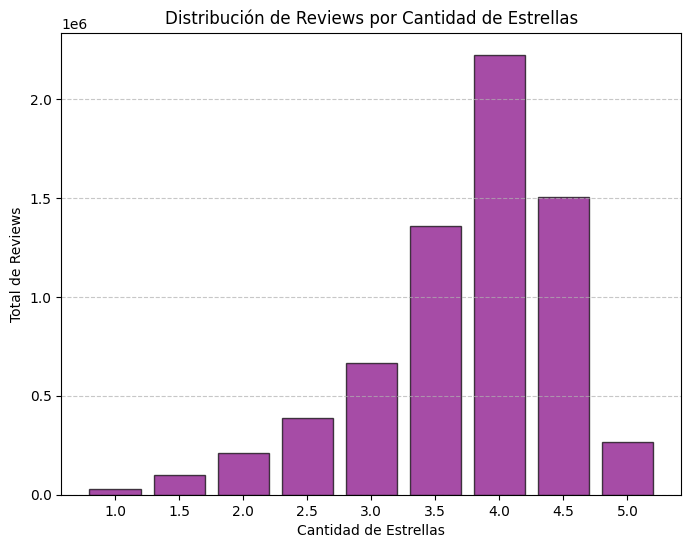

In [14]:
# Asegurar que 'stars' y 'review_count' sean numéricos
business_yelp['stars'] = pd.to_numeric(business_yelp['stars'], errors='coerce')
business_yelp['review_count'] = pd.to_numeric(business_yelp['review_count'], errors='coerce')

# Agrupar por 'stars' y sumar la cantidad de reviews en cada nivel de estrellas
reviews_por_estrella = business_yelp.groupby('stars')['review_count'].sum().reset_index()

# Renombrar columnas para mayor claridad
reviews_por_estrella.columns = ['stars', 'total_reviews']

# Crear el histograma
plt.figure(figsize=(8, 6))
plt.bar(reviews_por_estrella['stars'], reviews_por_estrella['total_reviews'], 
        color='purple', alpha=0.7, edgecolor='black', width=0.4)

# Personalizar el gráfico
plt.xlabel("Cantidad de Estrellas")
plt.ylabel("Total de Reviews")
plt.title("Distribución de Reviews por Cantidad de Estrellas")
plt.xticks(reviews_por_estrella['stars'])  # Asegurar que las etiquetas de X sean enteros
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


### Conclusiones sobre la Relación entre Estrellas y Cantidad de Reviews

- **Mayor cantidad de reviews en calificaciones medias-altas**: Los negocios con 3.5 y 4.0 estrellas concentran la mayor cantidad de reviews, lo que indica que son los más evaluados por los usuarios.  
- **Pico en 4.0 estrellas**: La mayor cantidad de reviews se encuentra en negocios con 4.0 estrellas, lo que sugiere que los clientes tienden a dejar más reseñas en negocios bien calificados pero no perfectos.  
- **Menos reviews en extremos (1.0 y 5.0 estrellas)**: Los negocios con 1.0 y 5.0 estrellas tienen significativamente menos reviews, lo que puede indicar que los clientes evitan negocios muy mal calificados o que menos negocios alcanzan una calificación perfecta.  
- **Caída en 4.5 y 5.0 estrellas**: Aunque los negocios con 4.5 estrellas aún reciben muchas reviews, la cantidad disminuye en 5.0 estrellas, posiblemente porque pocos negocios logran mantener esa calificación.  


## Análisis de las categorias de los negocios

In [15]:
# Asegurar que 'categories' no tenga valores nulos
business_yelp['categories'] = business_yelp['categories'].fillna('')

# Crear un diccionario para contar la cantidad de negocios por categoría
conteo_categorias = {}

for _, row in business_yelp.iterrows():
    categorias = row['categories'].split(', ')
    estado = row['state']
    
    for categoria in categorias:
        if categoria not in conteo_categorias:
            conteo_categorias[categoria] = {'total': 0, 'PA': 0, 'FL': 0}
        
        conteo_categorias[categoria]['total'] += 1  # Contar en total
        if estado == 'PA':
            conteo_categorias[categoria]['PA'] += 1  # Contar en PA
        elif estado == 'FL':
            conteo_categorias[categoria]['FL'] += 1  # Contar en FL

# Convertir a DataFrame
df_categorias_resumen = pd.DataFrame.from_dict(conteo_categorias, orient='index').reset_index()
df_categorias_resumen.rename(columns={'index': 'categoria'}, inplace=True)

# Filtrar solo las categorías que aparecen más de 100 veces
df_categorias_resumen = df_categorias_resumen[df_categorias_resumen['total'] > 100]

# Ordenar de mayor a menor según 'total'
df_categorias_resumen = df_categorias_resumen.sort_values(by='total', ascending=False)

print(df_categorias_resumen.head(10))


            categoria  total     PA    FL
17        Restaurants  52268  11675  9184
18               Food  27781   6349  4849
12           Shopping  24395   5466  4307
135     Home Services  14356   3201  2500
107     Beauty & Spas  14292   3246  2512
38          Nightlife  12281   2791  2111
4    Health & Medical  11890   2689  2121
7      Local Services  11198   2518  1975
36               Bars  11065   2515  1903
50         Automotive  10773   2533  1827


#### Conclusiones sobre la Distribución de Categorías de Negocios

- **Restaurantes dominan**: Es la categoría con mayor presencia, superando ampliamente al resto.  
- **Alimentos y Compras también son relevantes**: "Food" y "Shopping" están entre las categorías más comunes, reflejando alta demanda en estos sectores.  
- **Servicios del hogar y belleza bien representados**: "Home Services" y "Beauty & Spas" tienen una presencia significativa, indicando interés en mantenimiento y cuidado personal.  
- **PA y FL con patrones similares**: Aunque PA tiene más negocios en casi todas las categorías, la distribución entre ambos estados sigue tendencias similares.  


### Evaluación de la distribución de las categorías de negocios por estado (los más representativos)

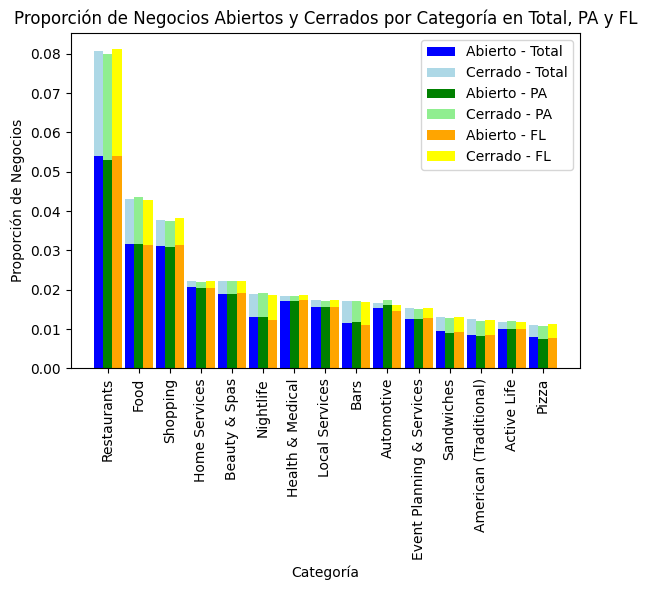

In [16]:
# Asegurar que 'is_open' sea numérico
business_yelp['is_open'] = pd.to_numeric(business_yelp['is_open'], errors='coerce')

# Crear un diccionario para contar abiertos y cerrados por categoría
conteo_abiertos_cerrados = {}

for _, row in business_yelp.iterrows():
    categorias = row['categories'].split(', ')
    estado = row['state']
    abierto = row['is_open']  # 1 = Abierto, 0 = Cerrado
    
    for categoria in categorias:
        if categoria not in conteo_abiertos_cerrados:
            conteo_abiertos_cerrados[categoria] = {'total': 0, 'PA': 0, 'FL': 0,
                                                   'abierto_total': 0, 'cerrado_total': 0,
                                                   'abierto_PA': 0, 'cerrado_PA': 0,
                                                   'abierto_FL': 0, 'cerrado_FL': 0}
        
        conteo_abiertos_cerrados[categoria]['total'] += 1
        if estado == 'PA':
            conteo_abiertos_cerrados[categoria]['PA'] += 1
        if estado == 'FL':
            conteo_abiertos_cerrados[categoria]['FL'] += 1
        
        if abierto == 1:
            conteo_abiertos_cerrados[categoria]['abierto_total'] += 1
            if estado == 'PA':
                conteo_abiertos_cerrados[categoria]['abierto_PA'] += 1
            elif estado == 'FL':
                conteo_abiertos_cerrados[categoria]['abierto_FL'] += 1
        else:
            conteo_abiertos_cerrados[categoria]['cerrado_total'] += 1
            if estado == 'PA':
                conteo_abiertos_cerrados[categoria]['cerrado_PA'] += 1
            elif estado == 'FL':
                conteo_abiertos_cerrados[categoria]['cerrado_FL'] += 1

# Convertir a DataFrame
df_categorias_resumen = pd.DataFrame.from_dict(conteo_abiertos_cerrados, orient='index').reset_index()
df_categorias_resumen.rename(columns={'index': 'categoria'}, inplace=True)

# Filtrar solo las categorías que aparecen más de 100 veces
df_categorias_resumen = df_categorias_resumen[df_categorias_resumen['total'] > 100]

# Ordenar por la cantidad total de negocios de mayor a menor
df_categorias_resumen = df_categorias_resumen.sort_values(by='total', ascending=False)

# Calcular proporciones de abiertos y cerrados en cada nivel (total, PA, FL)
df_categorias_resumen['proporcion_abiertos_total'] = df_categorias_resumen['abierto_total'] / df_categorias_resumen['total'].sum()
df_categorias_resumen['proporcion_cerrados_total'] = df_categorias_resumen['cerrado_total'] / df_categorias_resumen['total'].sum()

df_categorias_resumen['proporcion_abiertos_PA'] = df_categorias_resumen['abierto_PA'] / df_categorias_resumen['PA'].sum()
df_categorias_resumen['proporcion_cerrados_PA'] = df_categorias_resumen['cerrado_PA'] / df_categorias_resumen['PA'].sum()

df_categorias_resumen['proporcion_abiertos_FL'] = df_categorias_resumen['abierto_FL'] / df_categorias_resumen['FL'].sum()
df_categorias_resumen['proporcion_cerrados_FL'] = df_categorias_resumen['cerrado_FL'] / df_categorias_resumen['FL'].sum()

# Seleccionar las 15 categorías más comunes para visualizar mejor
df_top_categorias = df_categorias_resumen.head(15)

# Configurar el gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(6, 6))
x = np.arange(len(df_top_categorias))  # Posiciones en X
width = 0.3  # Ancho de las barras

# Graficar proporciones de abiertos y cerrados en cada categoría
ax.bar(x - width, df_top_categorias['proporcion_abiertos_total'], width, label='Abierto - Total', color='blue')
ax.bar(x - width, df_top_categorias['proporcion_cerrados_total'], width, bottom=df_top_categorias['proporcion_abiertos_total'], label='Cerrado - Total', color='lightblue')

ax.bar(x, df_top_categorias['proporcion_abiertos_PA'], width, label='Abierto - PA', color='green')
ax.bar(x, df_top_categorias['proporcion_cerrados_PA'], width, bottom=df_top_categorias['proporcion_abiertos_PA'], label='Cerrado - PA', color='lightgreen')

ax.bar(x + width, df_top_categorias['proporcion_abiertos_FL'], width, label='Abierto - FL', color='orange')
ax.bar(x + width, df_top_categorias['proporcion_cerrados_FL'], width, bottom=df_top_categorias['proporcion_abiertos_FL'], label='Cerrado - FL', color='yellow')

# Configuración del gráfico
ax.set_xlabel("Categoría")
ax.set_ylabel("Proporción de Negocios")
ax.set_title("Proporción de Negocios Abiertos y Cerrados por Categoría en Total, PA y FL")
ax.set_xticks(x)
ax.set_xticklabels(df_top_categorias['categoria'], rotation=90)  # Rotar etiquetas para mejor visualización
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


### Conclusiones sobre la Proporción de Negocios Abiertos y Cerrados por Categoría

- **Restaurantes dominan en cantidad y cierres**: Es la categoría con mayor proporción de negocios, pero también con un número significativo de cierres en todos los casos.  
- **Distribución similar en PA y FL**: Las proporciones de negocios abiertos y cerrados en cada categoría son similares en ambos estados.  
- **Food y Shopping siguen en relevancia**: Son las siguientes categorías con mayor proporción de negocios, aunque con menor cantidad de cierres en comparación con restaurantes.  
- **Home Services y Beauty & Spas tienen menor presencia**: Representan una menor proporción de negocios, pero muestran estabilidad en la relación entre abiertos y cerrados.  
- **Importante presencia de cierres en todas las categorías**: Aunque la mayoría de los negocios están abiertos, los cierres siguen siendo significativos en cada sector.  


### Análisis de distribución entre las calificación (por estrellas) y es estado (abierto o cerrado)

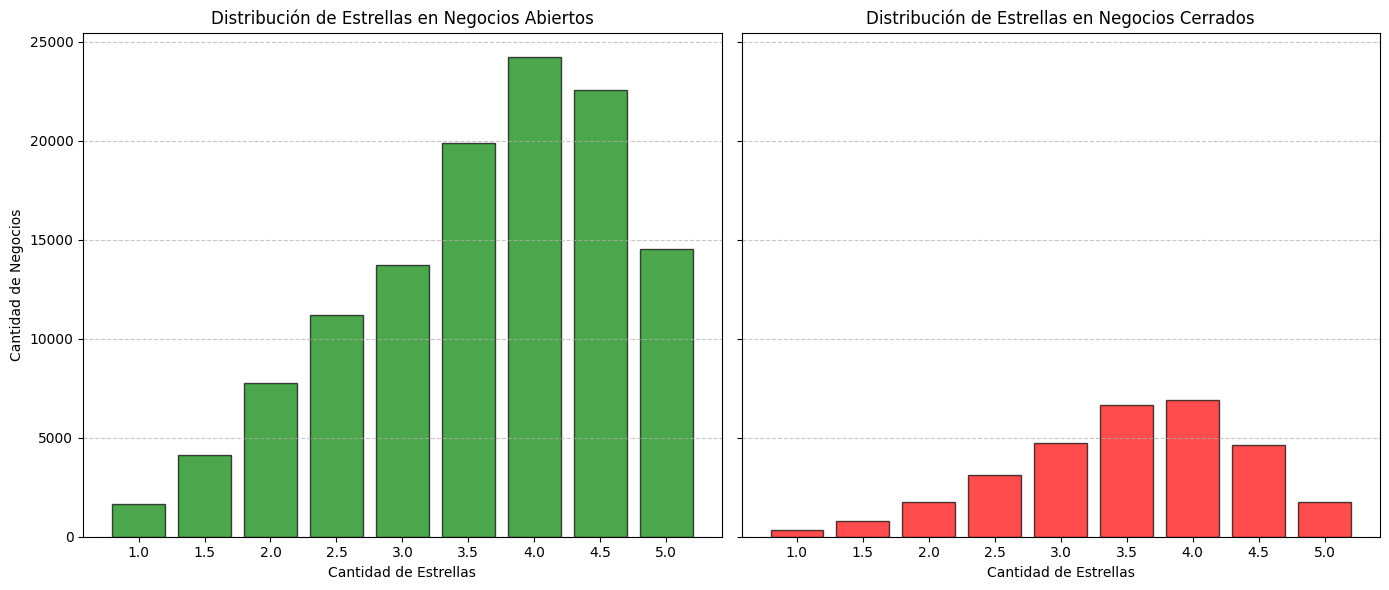

In [17]:
# Asegurar que 'stars' y 'is_open' sean numéricos
business_yelp['stars'] = pd.to_numeric(business_yelp['stars'], errors='coerce')
business_yelp['is_open'] = pd.to_numeric(business_yelp['is_open'], errors='coerce')

# Filtrar negocios abiertos y cerrados
negocios_abiertos = business_yelp[business_yelp['is_open'] == 1]
negocios_cerrados = business_yelp[business_yelp['is_open'] == 0]

# Contar la cantidad de negocios abiertos y cerrados por cada cantidad de estrellas
conteo_stars_abiertos = negocios_abiertos['stars'].value_counts().sort_index()
conteo_stars_cerrados = negocios_cerrados['stars'].value_counts().sort_index()

# Crear la figura con dos paneles (subplots)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Gráfico de negocios abiertos
axes[0].bar(conteo_stars_abiertos.index, conteo_stars_abiertos.values, color='green', alpha=0.7, edgecolor='black', width=0.4)
axes[0].set_xlabel("Cantidad de Estrellas")
axes[0].set_ylabel("Cantidad de Negocios")
axes[0].set_title("Distribución de Estrellas en Negocios Abiertos")
axes[0].set_xticks(conteo_stars_abiertos.index)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico de negocios cerrados
axes[1].bar(conteo_stars_cerrados.index, conteo_stars_cerrados.values, color='red', alpha=0.7, edgecolor='black', width=0.4)
axes[1].set_xlabel("Cantidad de Estrellas")
axes[1].set_title("Distribución de Estrellas en Negocios Cerrados")
axes[1].set_xticks(conteo_stars_cerrados.index)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar el layout para mejor visualización
plt.tight_layout()

# Mostrar el gráfico con dos paneles
plt.show()


### Conclusiones del Análisis de Proporción entre Calificación y Estado

- **Distribución similar en abiertos y cerrados**: La forma de la distribución es parecida, lo que sugiere que la calificación por estrellas no es un factor determinante en el cierre de negocios.  
- **Proporción de cierres en todas las calificaciones**: Aunque hay más negocios abiertos, el porcentaje de cierres parece mantenerse relativamente constante en todas las calificaciones.  
- **Negocios con calificaciones bajas no necesariamente cierran más**: No hay una caída abrupta de negocios cerrados en 1-2 estrellas, lo que indica que factores distintos a la reputación pueden influir en el cierre.  
- **Importancia de otros factores**: Dado que las calificaciones no muestran una gran diferencia en la proporción de cierres, sería interesante analizar otras características


## Análisis de Distribución de Estrellas en Negocios Abiertos y Cerrados ('Restaurants' y 'Food')

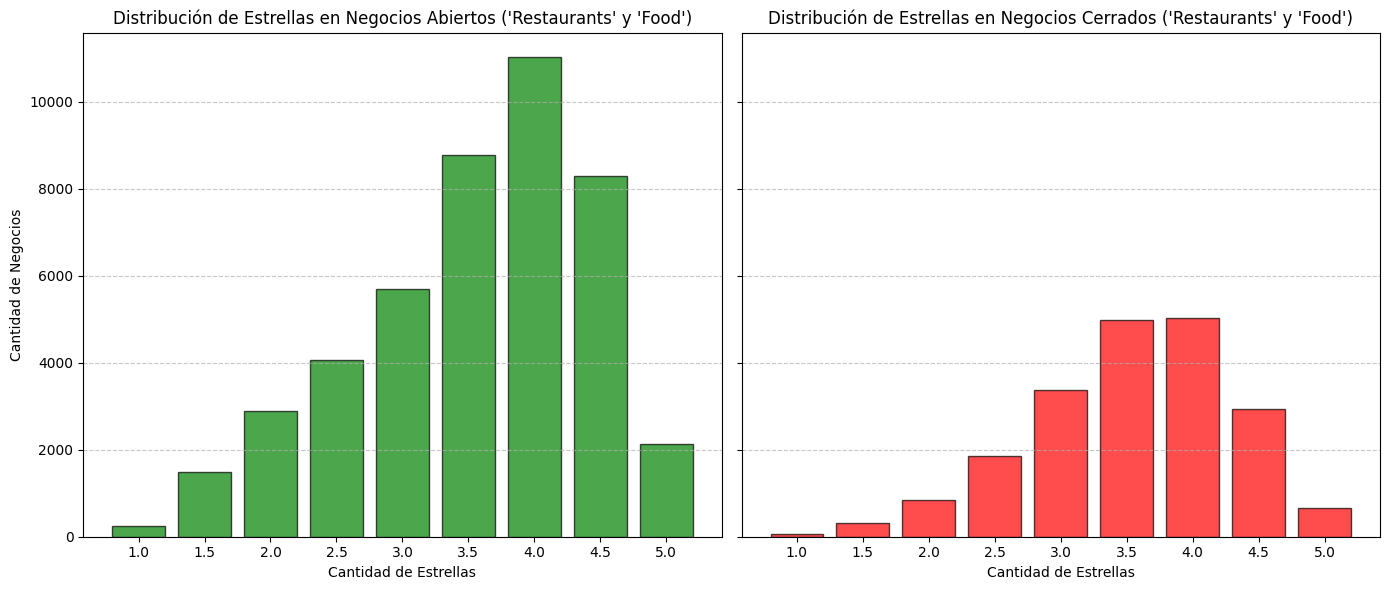

In [18]:
# Asegurar que 'stars' y 'is_open' sean numéricos
business_yelp['stars'] = pd.to_numeric(business_yelp['stars'], errors='coerce')
business_yelp['is_open'] = pd.to_numeric(business_yelp['is_open'], errors='coerce')

# Filtrar negocios que pertenecen a las categorías "Restaurants" o "Food"
business_filtered = business_yelp[business_yelp['categories'].str.contains("Restaurants|Food", na=False, case=False)]

# Filtrar negocios abiertos y cerrados dentro de estas categorías
negocios_abiertos = business_filtered[business_filtered['is_open'] == 1]
negocios_cerrados = business_filtered[business_filtered['is_open'] == 0]

# Contar la cantidad de negocios abiertos y cerrados por cada cantidad de estrellas
conteo_stars_abiertos = negocios_abiertos['stars'].value_counts().sort_index()
conteo_stars_cerrados = negocios_cerrados['stars'].value_counts().sort_index()

# Crear la figura con dos paneles (subplots)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Gráfico de negocios abiertos en "Restaurants" o "Food"
axes[0].bar(conteo_stars_abiertos.index, conteo_stars_abiertos.values, color='green', alpha=0.7, edgecolor='black', width=0.4)
axes[0].set_xlabel("Cantidad de Estrellas")
axes[0].set_ylabel("Cantidad de Negocios")
axes[0].set_title("Distribución de Estrellas en Negocios Abiertos ('Restaurants' y 'Food')")
axes[0].set_xticks(conteo_stars_abiertos.index)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico de negocios cerrados en "Restaurants" o "Food"
axes[1].bar(conteo_stars_cerrados.index, conteo_stars_cerrados.values, color='red', alpha=0.7, edgecolor='black', width=0.4)
axes[1].set_xlabel("Cantidad de Estrellas")
axes[1].set_title("Distribución de Estrellas en Negocios Cerrados ('Restaurants' y 'Food')")
axes[1].set_xticks(conteo_stars_cerrados.index)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar el layout para mejor visualización
plt.tight_layout()

# Mostrar el gráfico con dos paneles
plt.show()


### Conclusiones del Análisis de Distribución de Estrellas en Negocios Abiertos y Cerrados ('Restaurants' y 'Food')

- **Distribución similar a la general**: La tendencia de calificaciones en restaurantes y negocios de comida es parecida a la de todos los negocios, con un pico en 4.0 estrellas.  
- **Negocios abiertos mejor calificados**: La mayor parte de los negocios abiertos tienen entre 3.5 y 4.5 estrellas, lo que indica que los restaurantes con mejores calificaciones tienden a permanecer en el mercado.  
- **Cierres en todas las calificaciones**: Aunque hay más cierres en negocios con calificaciones entre 3.0 y 4.0 estrellas, también hay cierres en negocios altamente calificados (4.5 y 5.0 estrellas), lo que sugiere que la calificación no es el único factor determinante en la permanencia de un negocio.  
- **Pocos cierres con calificaciones bajas**: Relativamente pocos negocios cerrados tienen 1.0 o 2.0 estrellas, lo que puede deberse a que estos negocios no llegan a acumular muchas reseñas antes de cerrar.  
- **Impacto de la industria**: Dado que "Restaurants" y "Food" son sectores competitivos, otros factores como costos operativos, ubicación y competencia pueden influir más en la supervivencia que la calificación en sí.  


## Distribución de la Cantidad de Reviews en Negocios

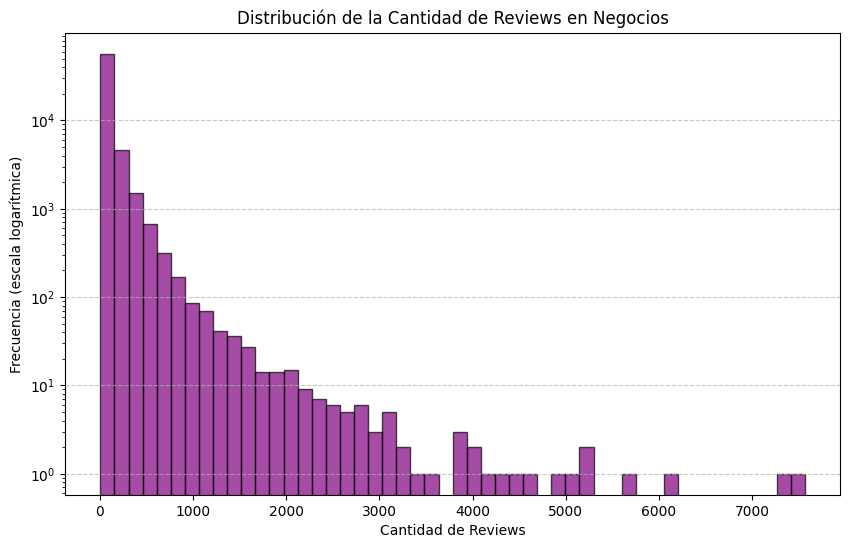

In [19]:
# Asegurar que 'review_count' sea numérico
business_filtered.loc[:, 'review_count'] = pd.to_numeric(business_filtered['review_count'], errors='coerce')


# Crear histograma de la distribución de la cantidad de reviews
plt.figure(figsize=(10, 6))
plt.hist(business_filtered['review_count'], bins=50, color='purple', alpha=0.7, edgecolor='black', log=True)

# Personalizar el gráfico
plt.xlabel("Cantidad de Reviews")
plt.ylabel("Frecuencia (escala logarítmica)")
plt.title("Distribución de la Cantidad de Reviews en Negocios")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


### Conclusiones de la Distribución de la Cantidad de Reviews en Negocios

- **Distribución altamente sesgada**: La mayoría de los negocios tienen pocas reviews, con una gran concentración en los primeros valores.  
- **Escala logarítmica necesaria**: Se utilizó una escala logarítmica para representar la distribución, lo que indica que la cantidad de reviews varía en órdenes de magnitud.  
- **Pocos negocios con muchas reviews**: A medida que aumenta la cantidad de reviews, la frecuencia de negocios con ese volumen disminuye drásticamente.  
- **Presencia de algunos outliers**: Existen negocios con más de 5000 reviews, lo que sugiere que algunos establecimientos son extremadamente populares en comparación con el resto.  
- **Posible efecto de la categoría**: Negocios con muchas reviews pueden estar concentrados en sectores específicos como restaurantes, entretenimiento o turismo.  


## Análisis de la cantidad de reviews en base a la calificación

In [20]:
business_filtered = business_filtered.copy()

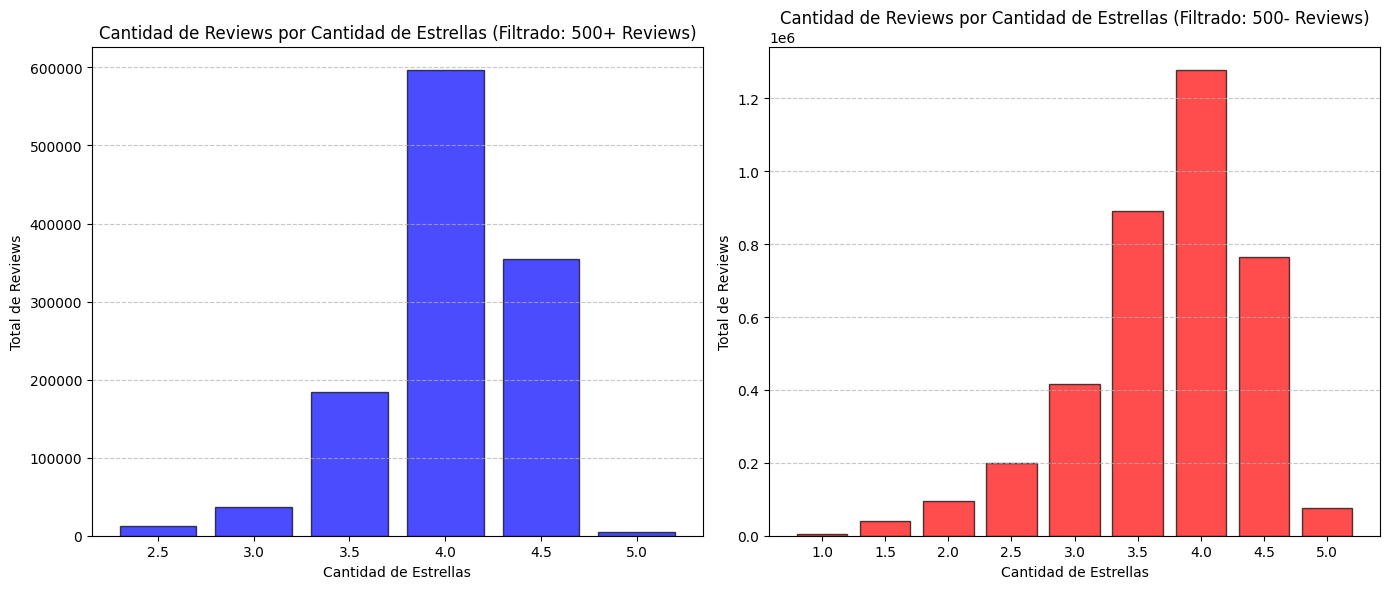

In [21]:
# Asegurar que 'review_count' y 'stars' sean numéricos
business_filtered.loc['review_count'] = pd.to_numeric(business_filtered['review_count'], errors='coerce')
business_filtered.loc['stars'] = pd.to_numeric(business_filtered['stars'], errors='coerce')

# Filtrar negocios con al menos 500 reviews
business_mas_500 = business_filtered[business_filtered['review_count'] >= 500]
business_menos_500 = business_filtered[business_filtered['review_count'] <= 500]

# Agrupar por estrellas y sumar la cantidad de reviews en cada nivel de estrellas
reviews_mas_500 = business_mas_500.groupby('stars')['review_count'].sum().reset_index()
reviews_menos_500 = business_menos_500.groupby('stars')['review_count'].sum().reset_index()

# Crear la figura con dos subgráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Gráfico 1: Negocios con 500+ reviews
axes[0].bar(reviews_mas_500['stars'], reviews_mas_500['review_count'], color='blue', alpha=0.7, edgecolor='black', width=0.4)
axes[0].set_xlabel("Cantidad de Estrellas")
axes[0].set_ylabel("Total de Reviews")
axes[0].set_title("Cantidad de Reviews por Cantidad de Estrellas (Filtrado: 500+ Reviews)")
axes[0].set_xticks(reviews_mas_500['stars']) 
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico 2: Negocios con 500- reviews
axes[1].bar(reviews_menos_500['stars'], reviews_menos_500['review_count'], color='red', alpha=0.7, edgecolor='black', width=0.4)
axes[1].set_xlabel("Cantidad de Estrellas")
axes[1].set_ylabel("Total de Reviews")
axes[1].set_title("Cantidad de Reviews por Cantidad de Estrellas (Filtrado: 500- Reviews)")
axes[1].set_xticks(reviews_menos_500['stars']) 
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar diseño
plt.tight_layout()
plt.show()

In [22]:
mas_500 = business_filtered[business_filtered['review_count'] > 500].shape[0]
menos_500 = business_filtered[business_filtered['review_count'] <= 500].shape[0]

print(f"Negocios con más de 500 reviews: {mas_500}")
print(f"Negocios con 500 o menos reviews: {menos_500}")

Negocios con más de 500 reviews: 1285
Negocios con 500 o menos reviews: 63331


### Conclusiones del Análisis de la Cantidad de Reviews en Base a la Calificación

- **Los negocios con más reviews tienen entre 3.5 y 4.5 estrellas**: En ambos gráficos, la mayor cantidad de reviews se concentra en negocios con calificaciones medias-altas.  
- **Patrón similar en ambos filtros**: Tanto en negocios con más de 500 reviews como en los de menos de 500, la tendencia es la misma: el pico de reviews está en 4.0 estrellas.  
- **Negocios con calificación baja reciben pocas reviews**: Los negocios con 1.0 a 2.5 estrellas tienen significativamente menos reviews, lo que indica que los usuarios tienden a no dejar tantas reseñas en establecimientos mal calificados.  
- **Negocios con 5 estrellas no acumulan tantas reviews**: A pesar de su calificación perfecta, los negocios con 5.0 estrellas no tienen el mayor número de reseñas, lo que sugiere que pocos establecimientos logran mantener esta calificación con una gran cantidad de opiniones.  
- **Diferencia en volumen absoluto**: La cantidad total de reviews en los negocios con menos de 500 reseñas es mucho mayor que en los de más de 500, lo que indica que la mayoría de los negocios no llegan a acumular grandes volúmenes de opiniones.  


In [23]:
# Filtrar los negocios según su estado y cantidad de reviews
abiertos_menos_500 = business_filtered[(business_filtered['is_open'] == 1) & (business_filtered['review_count'] <= 500)].shape[0]
abiertos_mas_500 = business_filtered[(business_filtered['is_open'] == 1) & (business_filtered['review_count'] > 500)].shape[0]
cerrados_menos_500 = business_filtered[(business_filtered['is_open'] == 0) & (business_filtered['review_count'] <= 500)].shape[0]
cerrados_mas_500 = business_filtered[(business_filtered['is_open'] == 0) & (business_filtered['review_count'] > 500)].shape[0]

# Mostrar resultados
print(f"Negocios abiertos con menos de 500 reviews: {abiertos_menos_500}")
print(f"Negocios abiertos con más de 500 reviews: {abiertos_mas_500}")
print(f"Negocios cerrados con menos de 500 reviews: {cerrados_menos_500}")
print(f"Negocios cerrados con más de 500 reviews: {cerrados_mas_500}")

Negocios abiertos con menos de 500 reviews: 43417
Negocios abiertos con más de 500 reviews: 1165
Negocios cerrados con menos de 500 reviews: 19914
Negocios cerrados con más de 500 reviews: 120


Definición provisoria de éxito = más de 4 estrellas y más de 500 reviews
Búsqueda de cantidad de negocios "exitosos"

In [24]:
# Contar el total de negocios
total_negocios = business_filtered.shape[0]

# Filtrar negocios con 4 o más estrellas y más de 500 reviews
negocios_4_mas_estrellas = business_filtered[(business_filtered['stars'] >= 4) & (business_filtered['review_count'] > 500)].shape[0]

# Mostrar el resultado con el total
print(f"Negocios con 4 o más estrellas y más de 500 reviews: {negocios_4_mas_estrellas}, de {total_negocios} en total.")

Negocios con 4 o más estrellas y más de 500 reviews: 992, de 64618 en total.


Solo el 1.5% de los negocios son "exitosos", hay que cambiar la definición de "éxito"

In [25]:
print(business_filtered.describe())

              stars  review_count       is_open
count  64616.000000  64616.000000  64616.000000
mean       3.545956     76.614089      0.689953
std        0.853919    173.383983      0.462516
min        1.000000      5.000000      0.000000
25%        3.000000     12.000000      0.000000
50%        3.500000     28.000000      1.000000
75%        4.000000     75.000000      1.000000
max        5.000000   7568.000000      1.000000


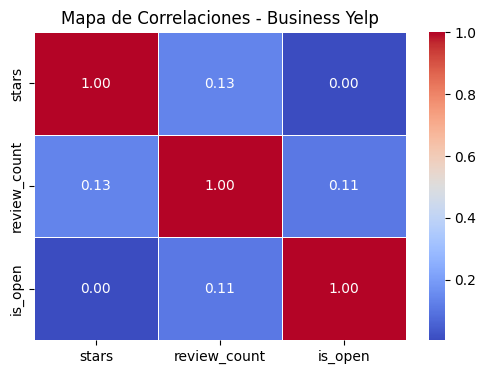

In [26]:
# Seleccionar solo las columnas numéricas relevantes
correlation_data = business_filtered[['stars', 'review_count', 'is_open']]

# Calcular la matriz de correlación
correlation_matrix = correlation_data.corr()

# Graficar el mapa de calor
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Personalización del gráfico
plt.title('Mapa de Correlaciones - Business Yelp')
plt.show()


#### Análisis del Mapa de Correlaciones - Business Yelp

   - Ninguna variable tiene una fuerte relación con otra (todas están cerca de 0).  
   - Esto indica que `stars`, `review_count` e `is_open` no están fuertemente conectadas entre sí.  


## Vamos a trabajar solo con el estado de Florida
por lo que se filtran los negocios. El estado está mal clasificado en la base de datos, por lo que see van a filtrar por ciudad (que corresponden tanto en dirección como en coordenadas al estado de Florida).
Para ello se tuvieron en cuenta las ciudades de Florida listadas en [link](https://www.florida-demographics.com/cities_by_population).

In [27]:
florida = pd.read_csv('florida_population.csv')

In [28]:
# Asegurar que la columna 'City' en florida y 'city' en business_filtered tienen el mismo formato
florida['City'] = florida['City'].str.strip().str.lower()
business_filtered['city'] = business_filtered['city'].str.strip().str.lower()

# Filtrar business_filtered para quedarse solo con ciudades que están en florida
business_filtered_fl = business_filtered[business_filtered['city'].isin(florida['City'])]

# Verificar resultados
print(f"Registros originales en business_filtered: {len(business_filtered)}")
print(f"Registros después del filtrado: {len(business_filtered_fl)}")

Registros originales en business_filtered: 64618
Registros después del filtrado: 10927


In [29]:
business_filtered_fl.to_csv('business_yelp.csv')

## Análisis de los atributos de los locales gastronómicos

In [30]:
business_filtered = pd.read_csv('business_yelp.csv')

In [31]:
# Convertir 'attributes' en diccionario real si está en formato string
business_filtered['attributes'] = business_filtered['attributes'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# Expandir la columna 'attributes' en columnas separadas
attributes_df = business_filtered['attributes'].apply(pd.Series)

# Función para expandir subdiccionarios dentro de los atributos
def expand_subdicts(df):
    for col in df.columns:
        try:
            df_expanded = df[col].dropna().apply(ast.literal_eval).apply(pd.Series)
            df_expanded = df_expanded.add_prefix(f"{col}_")  # Agregar prefijo
            df = pd.concat([df.drop(columns=[col]), df_expanded], axis=1)
        except (ValueError, SyntaxError, TypeError):
            pass  # Si no se puede convertir, ignorar
    return df

# Aplicar la función para aplanar subdiccionarios
attributes_df = expand_subdicts(attributes_df)

# Unir con el DataFrame original sin la columna 'attributes'
business_filtered = pd.concat([business_filtered.drop(columns=['attributes']), attributes_df], axis=1)

# Convertir valores "True/False" en 1/0
business_filtered = business_filtered.map(lambda x: 1 if str(x).lower() == 'true' else (0 if str(x).lower() == 'false' else x))

# Reemplazar NaN con 0 para evitar problemas
business_filtered = business_filtered.fillna(0)

# Verificar las primeras filas
print(business_filtered.head())


   Unnamed: 0             business_id                  name  \
0          14  0bPLkL0QhhPO5kt1_EXmNQ  Zio's Italian Market   
1          54  0qNpTGTcqPwOLi2hADx4Xw      Charlie's Market   
2          58  uI9XODGY_2_ieTE6xJ0myw           Roman Forum   
3          59  JgpnXv_0XhV3SfbfB50nxw           Joe's Pizza   
4          69  KWA2qtdwVEkMpd5soSKaGA   Publix Super Market   

                  address    city state  postal_code   latitude  longitude  \
0           2575 E Bay Dr   largo    FL      33771.0  27.916116 -82.760461   
1        2815 E Sligh Ave   tampa    IN      33610.0  28.010360 -82.430042   
2  10440 N Dale Mabry Hwy   tampa    PA      33618.0  28.046203 -82.505053   
3   2038 N Dale Mabry Hwy   tampa    AZ      33607.0  27.960514 -82.506127   
4         12101 Little Rd  hudson    ID      34667.0  28.332601 -82.668107   

   stars  ...  HairSpecializesIn_kids  HairSpecializesIn_perms  \
0    4.5  ...                     0.0                      0.0   
1    3.0  ...       

In [32]:
print(business_filtered.describe())

          Unnamed: 0    postal_code      latitude     longitude         stars  \
count   10927.000000   10927.000000  10927.000000  10927.000000  10927.000000   
mean    75511.779079   34008.866111     29.062737    -82.498536      3.573808   
std     43205.625484    7653.025078      3.291642      2.140051      0.861614   
min        14.000000       0.000000     27.564457    -90.348573      1.000000   
25%     38202.000000   33604.000000     27.923922    -82.732994      3.000000   
50%     75888.000000   33626.000000     27.996878    -82.537081      3.500000   
75%    112870.500000   33777.000000     28.143200    -82.430038      4.000000   
max    150297.000000  336140.000000     40.348600    -74.701164      5.000000   

       review_count       is_open  OutdoorSeating_0  \
count  10927.000000  10927.000000      10927.000000   
mean      69.554407      0.708795          0.355450   
std      132.574399      0.454339          0.478671   
min        5.000000      0.000000          0.00000

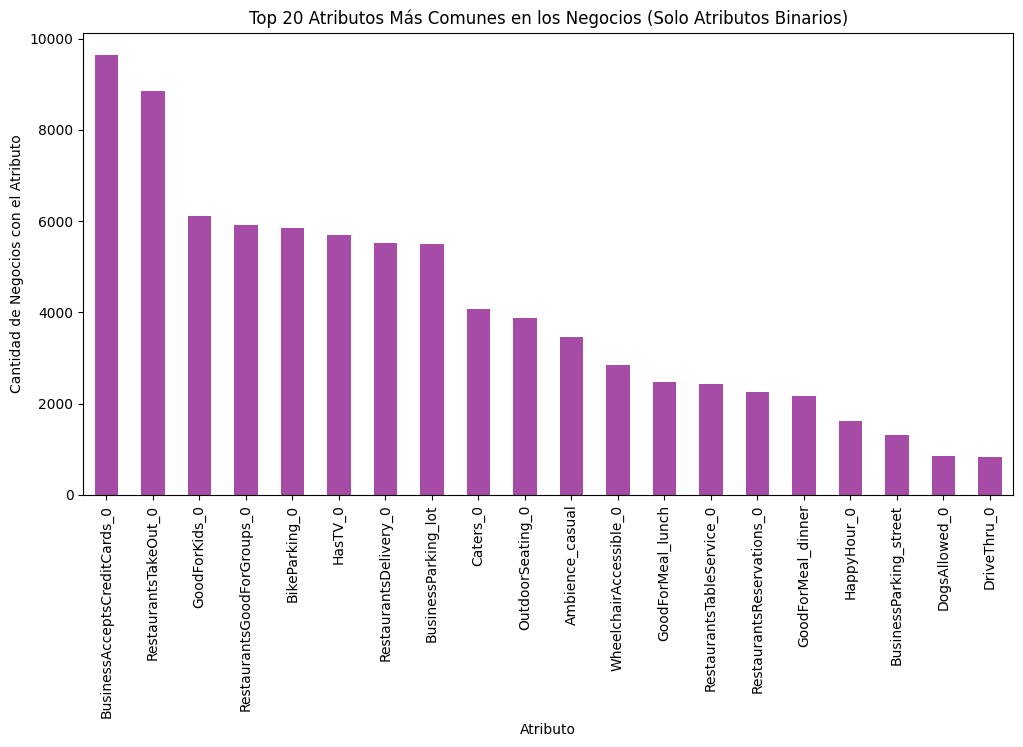

In [33]:
# Definir las columnas irrelevantes que queremos excluir
columns_to_exclude = ['Unnamed: 0', 'business_id', 'name', 'address', 'city', 'state', 'postal_code',
                      'latitude', 'longitude', 'stars', 'review_count', 'is_open', 'categories', 'hours',
                      'RestaurantsPriceRange2_0']  # Excluir rango de precios porque no es binario

# Seleccionar solo las columnas de atributos binarios
attribute_columns = [col for col in business_filtered.columns if col not in columns_to_exclude]

# Sumar la cantidad de negocios que tienen cada atributo activado
attribute_counts = business_filtered[attribute_columns].apply(pd.to_numeric, errors='coerce').sum().sort_values(ascending=False)

# Gráfico de barras con los atributos más comunes
plt.figure(figsize=(12, 6))
attribute_counts.head(20).plot(kind="bar", color="purple", alpha=0.7)
plt.title("Top 20 Atributos Más Comunes en los Negocios (Solo Atributos Binarios)")
plt.ylabel("Cantidad de Negocios con el Atributo")
plt.xlabel("Atributo")
plt.xticks(rotation=90)
plt.show()

### Análisis de los Atributos Binarios en los Negocios

#### Distribución de los Atributos Más Comunes

El gráfico muestra los 20 atributos binarios más comunes en los negocios del conjunto de datos. Se han excluido los valores no binarios, como el rango de precios, para centrar el análisis en variables que indican la presencia o ausencia de una característica específica.

##### Observaciones Claves:

1. **Los atributos más comunes** incluyen:
   - **BusinessAcceptsCreditCards_0**: Indica si los negocios aceptan tarjetas de crédito.
   - **RestaurantsTakeOut_0**: Refiere a la disponibilidad de pedidos para llevar.
   - **RestaurantsGoodForGroups_0**: Muestra si los restaurantes están preparados para recibir grupos.
   - **GoodForKids_0**: Indica si el negocio es apto para niños.
   - **BikeParking_0**: Muestra la disponibilidad de estacionamiento para bicicletas.

2. **Presencia de atributos relacionados con la accesibilidad y el ambiente**:
   - **WheelchairAccessible_0**: Aunque no es de los atributos más comunes, hay una cantidad considerable de negocios que lo reportan.
   - **Ambience_casual** y **Ambience_classy**: Reflejan la percepción del ambiente en los establecimientos.

3. **Servicios adicionales**:
   - **RestaurantsDelivery_0**: Indica que una cantidad significativa de negocios ofrecen servicio de entrega.
   - **BusinessParking_lot** y **BusinessParking_street**: Resaltan la importancia del estacionamiento para los clientes.

4. **Menor presencia de atributos específicos**:
   - **DriveThru_0** y **HappyHour_0** aparecen en menor cantidad, lo que sugiere que no son características ampliamente ofrecidas.

##### Conclusión:

El análisis permite identificar qué características son más comunes entre los negocios y pueden ser diferenciadores en la oferta de servicios. La aceptación de tarjetas de crédito y la posibilidad de pedidos para llevar son aspectos clave, mientras que elementos como el estacionamiento o la accesibilidad pueden impactar la experiencia del cliente en menor medida pero siguen siendo relevantes. Este tipo de información puede ser útil para estrategias de mercado y toma de decisiones empresariales.

## Análisis de correlaciones atributos y estrellas
El análisis de correlación permite identificar qué atributos de los negocios están más asociados con las calificaciones otorgadas por los usuarios. Se analizaron únicamente las correlaciones absolutas mayores a 0.1 para enfocarse en relaciones significativas.

In [34]:
# Copia del DataFrame original
df = business_filtered.copy()

# Lista de columnas categóricas a convertir en variables dummies
categorical_columns = [
    "WiFi_0",
    "RestaurantsAttire_0",
    "NoiseLevel_0",
    "Alcohol_0",
    "Smoking_0",
    "BYOBCorkage_0",
    "AgesAllowed_0"
]

# Aplicar get_dummies solo a esas columnas
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True, dtype=int)

In [35]:
# Calcular la matriz de correlación solo con columnas numéricas
df_numeric = df.select_dtypes(include=[np.number])
correlation_matrix = df_numeric.corr()

# Filtrar correlaciones con 'stars' y tomar las que tienen |correlación| > 0.1
correlation_stars = correlation_matrix["stars"].abs()
filtered_correlation = correlation_stars[correlation_stars > 0.1].sort_values(ascending=False)

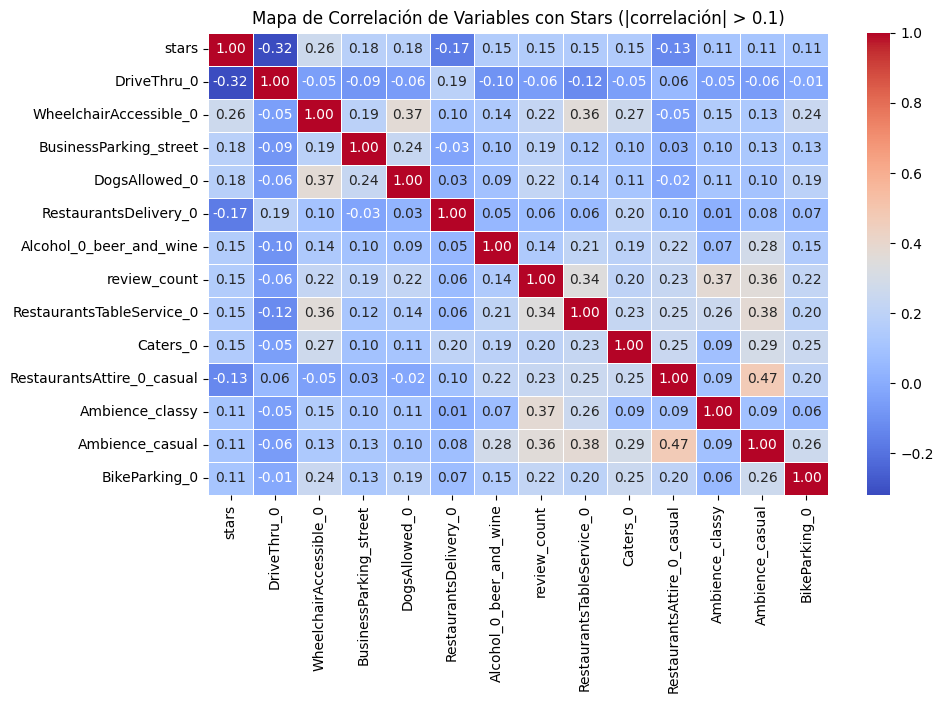

In [36]:
# Visualizar el mapa de correlación de las variables relevantes
plt.figure(figsize=(10, 6))
sns.heatmap(df[filtered_correlation.index].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Correlación de Variables con Stars (|correlación| > 0.1)")
plt.show()

### Conclusiones del Análisis de Correlación

#### Relación entre "stars" y otras variables
- La variable **"DriveThru_0"** tiene la correlación negativa más fuerte con "stars" (-0.32), lo que sugiere que los negocios con servicio de auto son peor calificados en promedio.
- **"WheelchairAccessible_0"** presenta una correlación positiva moderada con "stars" (0.26), lo que indica que los negocios accesibles para sillas de ruedas tienden a recibir mejores calificaciones.
- **"BusinessParking_street"** tiene una correlación de 0.18 con "stars", lo que sugiere una leve relación positiva entre el estacionamiento en la calle y una mejor calificación.
- **"DogsAllowed_0"** muestra una correlación de 0.18 con "stars", indicando que los negocios que permiten perros pueden ser mejor calificados.
- **"RestaurantsDelivery_0"** tiene una correlación negativa de -0.17 con "stars", lo que sugiere que los negocios con servicio de entrega pueden recibir peores calificaciones.

#### Impacto de características específicas en la calificación
- **"Alcohol_0_beer_and_wine"** tiene una correlación de 0.15 con "stars", lo que indica que la venta de cerveza y vino puede estar asociada a mejores calificaciones.
- **"review_count"** presenta una correlación de 0.15 con "stars", lo que indica que los negocios con más reseñas tienden a tener calificaciones ligeramente más altas.
- **"RestaurantsTableService_0"** tiene una correlación de 0.15 con "stars", lo que sugiere que los restaurantes con servicio de mesa pueden ser mejor valorados.
- **"RestaurantsAttire_0_casual"** tiene una correlación negativa de -0.13 con "stars", indicando que los restaurantes con vestimenta casual pueden recibir calificaciones ligeramente más bajas.
- **"Ambience_classy"** y **"Ambience_casual"** tienen correlaciones positivas de 0.11 con "stars", lo que sugiere que ambos tipos de ambiente pueden influir en la percepción del cliente.

#### Observaciones generales
- No se encontraron correlaciones extremadamente fuertes (por encima de 0.5), lo que indica que ninguna variable es un predictor absoluto de la calificación de un negocio.
- Se identificaron relaciones moderadas que pueden influir en la percepción del cliente, especialmente en aspectos de accesibilidad, servicio y tipo de ambiente.



---

## **Evaluación de Calificaciones con Bayesian Average Score**

### Problema
Al evaluar la calidad de un negocio basado únicamente en su calificación promedio (estrellas), nos encontramos con un problema: 
negocios con pocas reviews pueden obtener calificaciones extremas (muy altas o muy bajas) que no reflejan con precisión la realidad. 
Por ejemplo:

- Un negocio con **5 estrellas y solo 5 reviews** puede parecer mejor que uno con **4.7 estrellas y 2000 reviews**, 
  cuando en realidad el segundo tiene una reputación más confiable.
- De la misma manera, un negocio con **1 estrella y 3 reviews** podría ser castigado injustamente si esas calificaciones 
  no representan la opinión general de una gran cantidad de clientes.

### Solución: *Bayesian Average Score*
Para corregir este sesgo, utilizamos el **Bayesian Average Score**, que ajusta el promedio de calificaciones tomando en cuenta 
la cantidad de reviews. La fórmula es:

$$
\text{Bayesian Score} = \frac{\mu \cdot m + r \cdot s}{m + r}
$$


Donde:
- \( s \) = Promedio de estrellas del negocio
- \( r \) = Cantidad de reviews del negocio
- \( m \) = Umbral mínimo de reviews para considerar confiable (generalmente el promedio de reviews en el dataset)
- \( \mu \) = Promedio global de todas las calificaciones en el dataset

Este método **penaliza** negocios con pocas reviews, ajustando su calificación hacia la media global del dataset. 
A medida que un negocio recibe más reviews, su calificación se acerca más a su verdadero promedio.

### Beneficios de este índice
1. **Evita el sesgo de negocios con pocas reviews**: No sobrevalora negocios con calificaciones extremas y pocos datos.
2. **Aumenta la confiabilidad de la calificación**: Un negocio con muchas reviews tendrá un ranking más estable y representativo.
3. **Es justo tanto para negocios nuevos como establecidos**: A los nuevos negocios se les asigna un puntaje más neutral hasta que acumulen suficientes reviews.

### Conclusión
El **Bayesian Average Score** es una solución efectiva para evaluar negocios de manera más justa, 
considerando tanto la calidad de las calificaciones como la cantidad de datos disponibles. 
Este enfoque proporciona un ranking más confiable para la toma de decisiones basada en reviews.


In [ ]:
# Cargar el dataset
df_ba = df.copy()

# Parámetros para el Bayesian Average
mu = df_ba['stars'].mean()  # Promedio global de estrellas
m = df_ba['review_count'].mean()  # Cantidad mínima de reviews para considerar confiable

# Cálculo del Bayesian Average Score
df_ba['bayesian_score'] = (mu * m + df_ba['review_count'] * df_ba['stars']) / (m + df_ba['review_count'])

# Mostrar los primeros resultados
print(df_ba[['name', 'stars', 'review_count', 'bayesian_score']].head())

                   name  stars  review_count  bayesian_score
0  Zio's Italian Market    4.5         100.0        4.120059
1      Charlie's Market    3.0           9.0        3.508067
2           Roman Forum    4.0          23.0        3.679718
3           Joe's Pizza    4.0          35.0        3.716477
4   Publix Super Market    3.5           7.0        3.567059


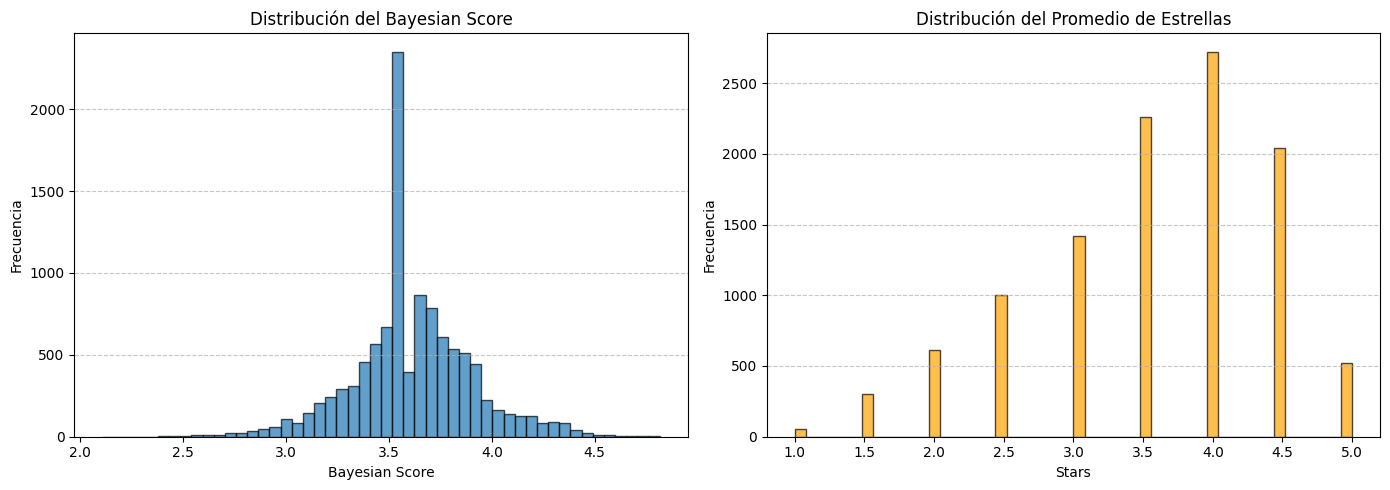

In [ ]:
# Crear la figura con dos paneles
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma del Bayesian Score
axes[0].hist(df_ba['bayesian_score'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Bayesian Score')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución del Bayesian Score')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Histograma del promedio de estrellas
axes[1].hist(df_ba['stars'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_xlabel('Stars')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Distribución del Promedio de Estrellas')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()

### Conclusiones sobre la Distribución del Bayesian Score y Promedio de Estrellas

#### 1. Distribución del Bayesian Score
- La distribución del **Bayesian Score** es más **suave y centrada** en comparación con la distribución del promedio de estrellas.
- Se observa un **pico notable alrededor de 3.5**, lo que indica que la mayoría de los negocios tienen una calificación ajustada cercana a este valor.
- Los valores extremos (muy altos o muy bajos) están **más controlados**, lo que sugiere que el ajuste Bayesiano mitiga la influencia de negocios con pocas reviews.

#### 2. Distribución del Promedio de Estrellas
- La calificación promedio de estrellas tiene una **distribución discreta**, con valores concentrados en 3.0, 3.5, 4.0 y 4.5 estrellas.
- Hay un **sesgo hacia valores altos** (muchos negocios tienen 4.0 o más), lo que puede indicar una tendencia a calificaciones positivas en la plataforma.
- Negocios con **1 estrella son poco frecuentes**, lo que sugiere que las malas calificaciones son menos comunes o que los negocios con malas calificaciones tienden a desaparecer del mercado.

#### 3. Comparación entre ambas distribuciones
- El **Bayesian Score ajusta las calificaciones extremas**, reduciendo la volatilidad de los negocios con pocas reviews.
- La distribución del Bayesian Score es más **normalizada**, mientras que la de las estrellas muestra una **tendencia a calificaciones altas**.
- El ajuste Bayesiano proporciona un ranking **más confiable y representativo**, especialmente para negocios con menos reviews.

#### Conclusión General
El uso del **Bayesian Score** es una estrategia efectiva para evitar que negocios con pocas reviews y calificaciones extremas dominen el ranking. La distribución resultante es más estable y equitativa, ofreciendo una evaluación más justa de la calidad de los negocios.


In [3]:
business_filtered = pd.read_csv(r'C:\Users\paula\OneDrive\Curso\Henry\PF\business_yelp.csv')

In [4]:
business_filtered['business_id'].nunique()

10927